In [11]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Carrega o dataset (supondo que ele esteja em um arquivo CSV)
df = pd.read_csv('data/all.csv')

# Separa os parâmetros (features) e o diagnóstico (alvo)
parameters = df.iloc[:, :-1]
diagnosis = df.iloc[:, -1]

In [13]:
# Cria o classificador Naive Bayes
clf = GaussianNB()

# Realiza a validação cruzada estratificada com 10 folds
cv = 10
skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
scores = cross_val_score(clf, parameters, diagnosis, cv=skf, scoring='accuracy')

# # Exibe as acurácias obtidas em cada fold e a média
# print("Acurácias por fold:")
# for score in scores: print(f"{score:.2f}", end=' ')
# print("\n\nAcurácia média:", scores.mean())

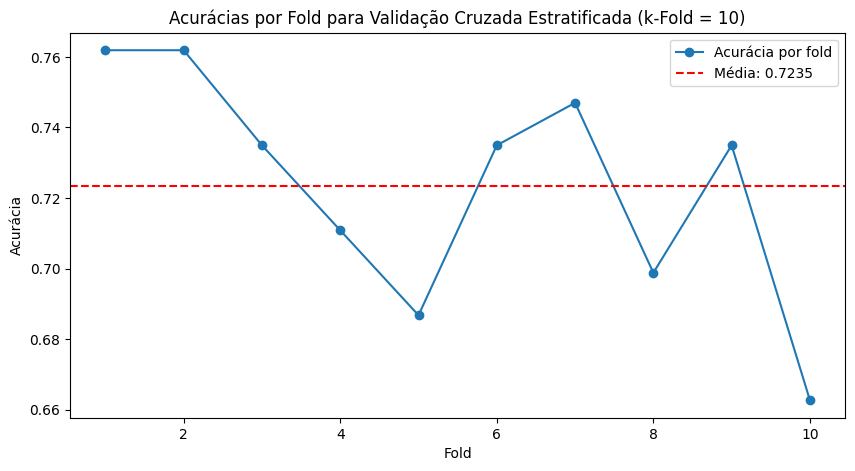

In [14]:
# Plota as acurácias por fold
plt.figure(figsize=(10, 5))
plt.plot(range(1, cv + 1), scores, marker='o', linestyle='-', label='Acurácia por fold')
plt.axhline(scores.mean(), color='red', linestyle='--', label=f'Média: {scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.title('Acurácias por Fold para Validação Cruzada Estratificada (k-Fold = 10)')
plt.legend()
plt.show()

C:\Users\DaviD\AppData\Local\Temp\ipykernel_21980\1584331425.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_scores, labels=cv_values)


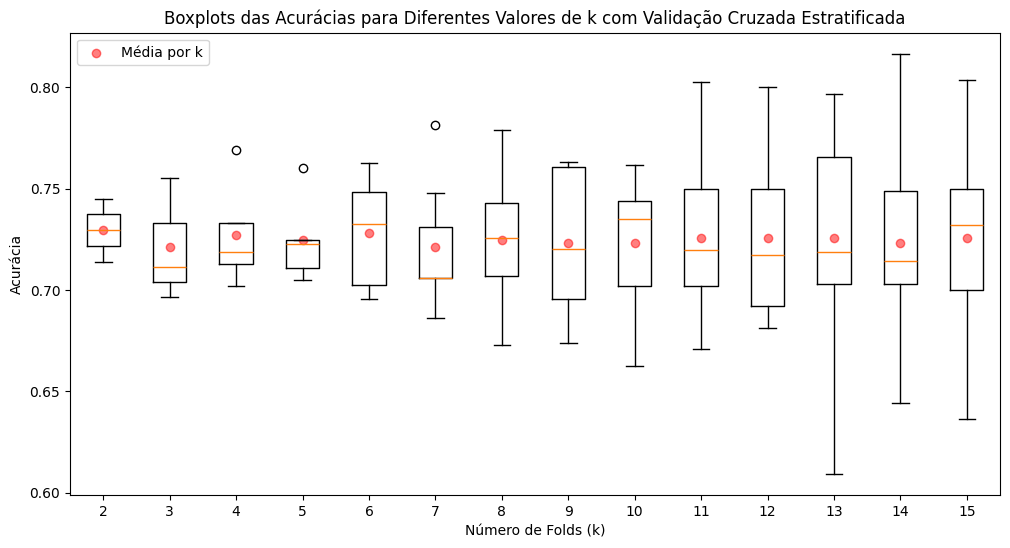

In [15]:
# Gera box plots para cv de 2 a 15
cv_values = range(2, 16)
all_scores = [cross_val_score(clf, parameters, diagnosis, cv=StratifiedKFold(n_splits=k, shuffle=True, random_state=42), scoring='accuracy') for k in cv_values]
means = [np.mean(scores) for scores in all_scores]

plt.figure(figsize=(12, 6))
plt.boxplot(all_scores, labels=cv_values)
plt.scatter(range(1, len(cv_values) + 1), means, marker='o', color='red', alpha=0.5, label='Média por k')
plt.xlabel('Número de Folds (k)')
plt.ylabel('Acurácia')
plt.title('Boxplots das Acurácias para Diferentes Valores de k com Validação Cruzada Estratificada')
plt.legend()
plt.show()